In [1]:
import numpy as np # linear algebra
from scipy import stats # statistic library
import pandas as pd # To table manipulations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_dataset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


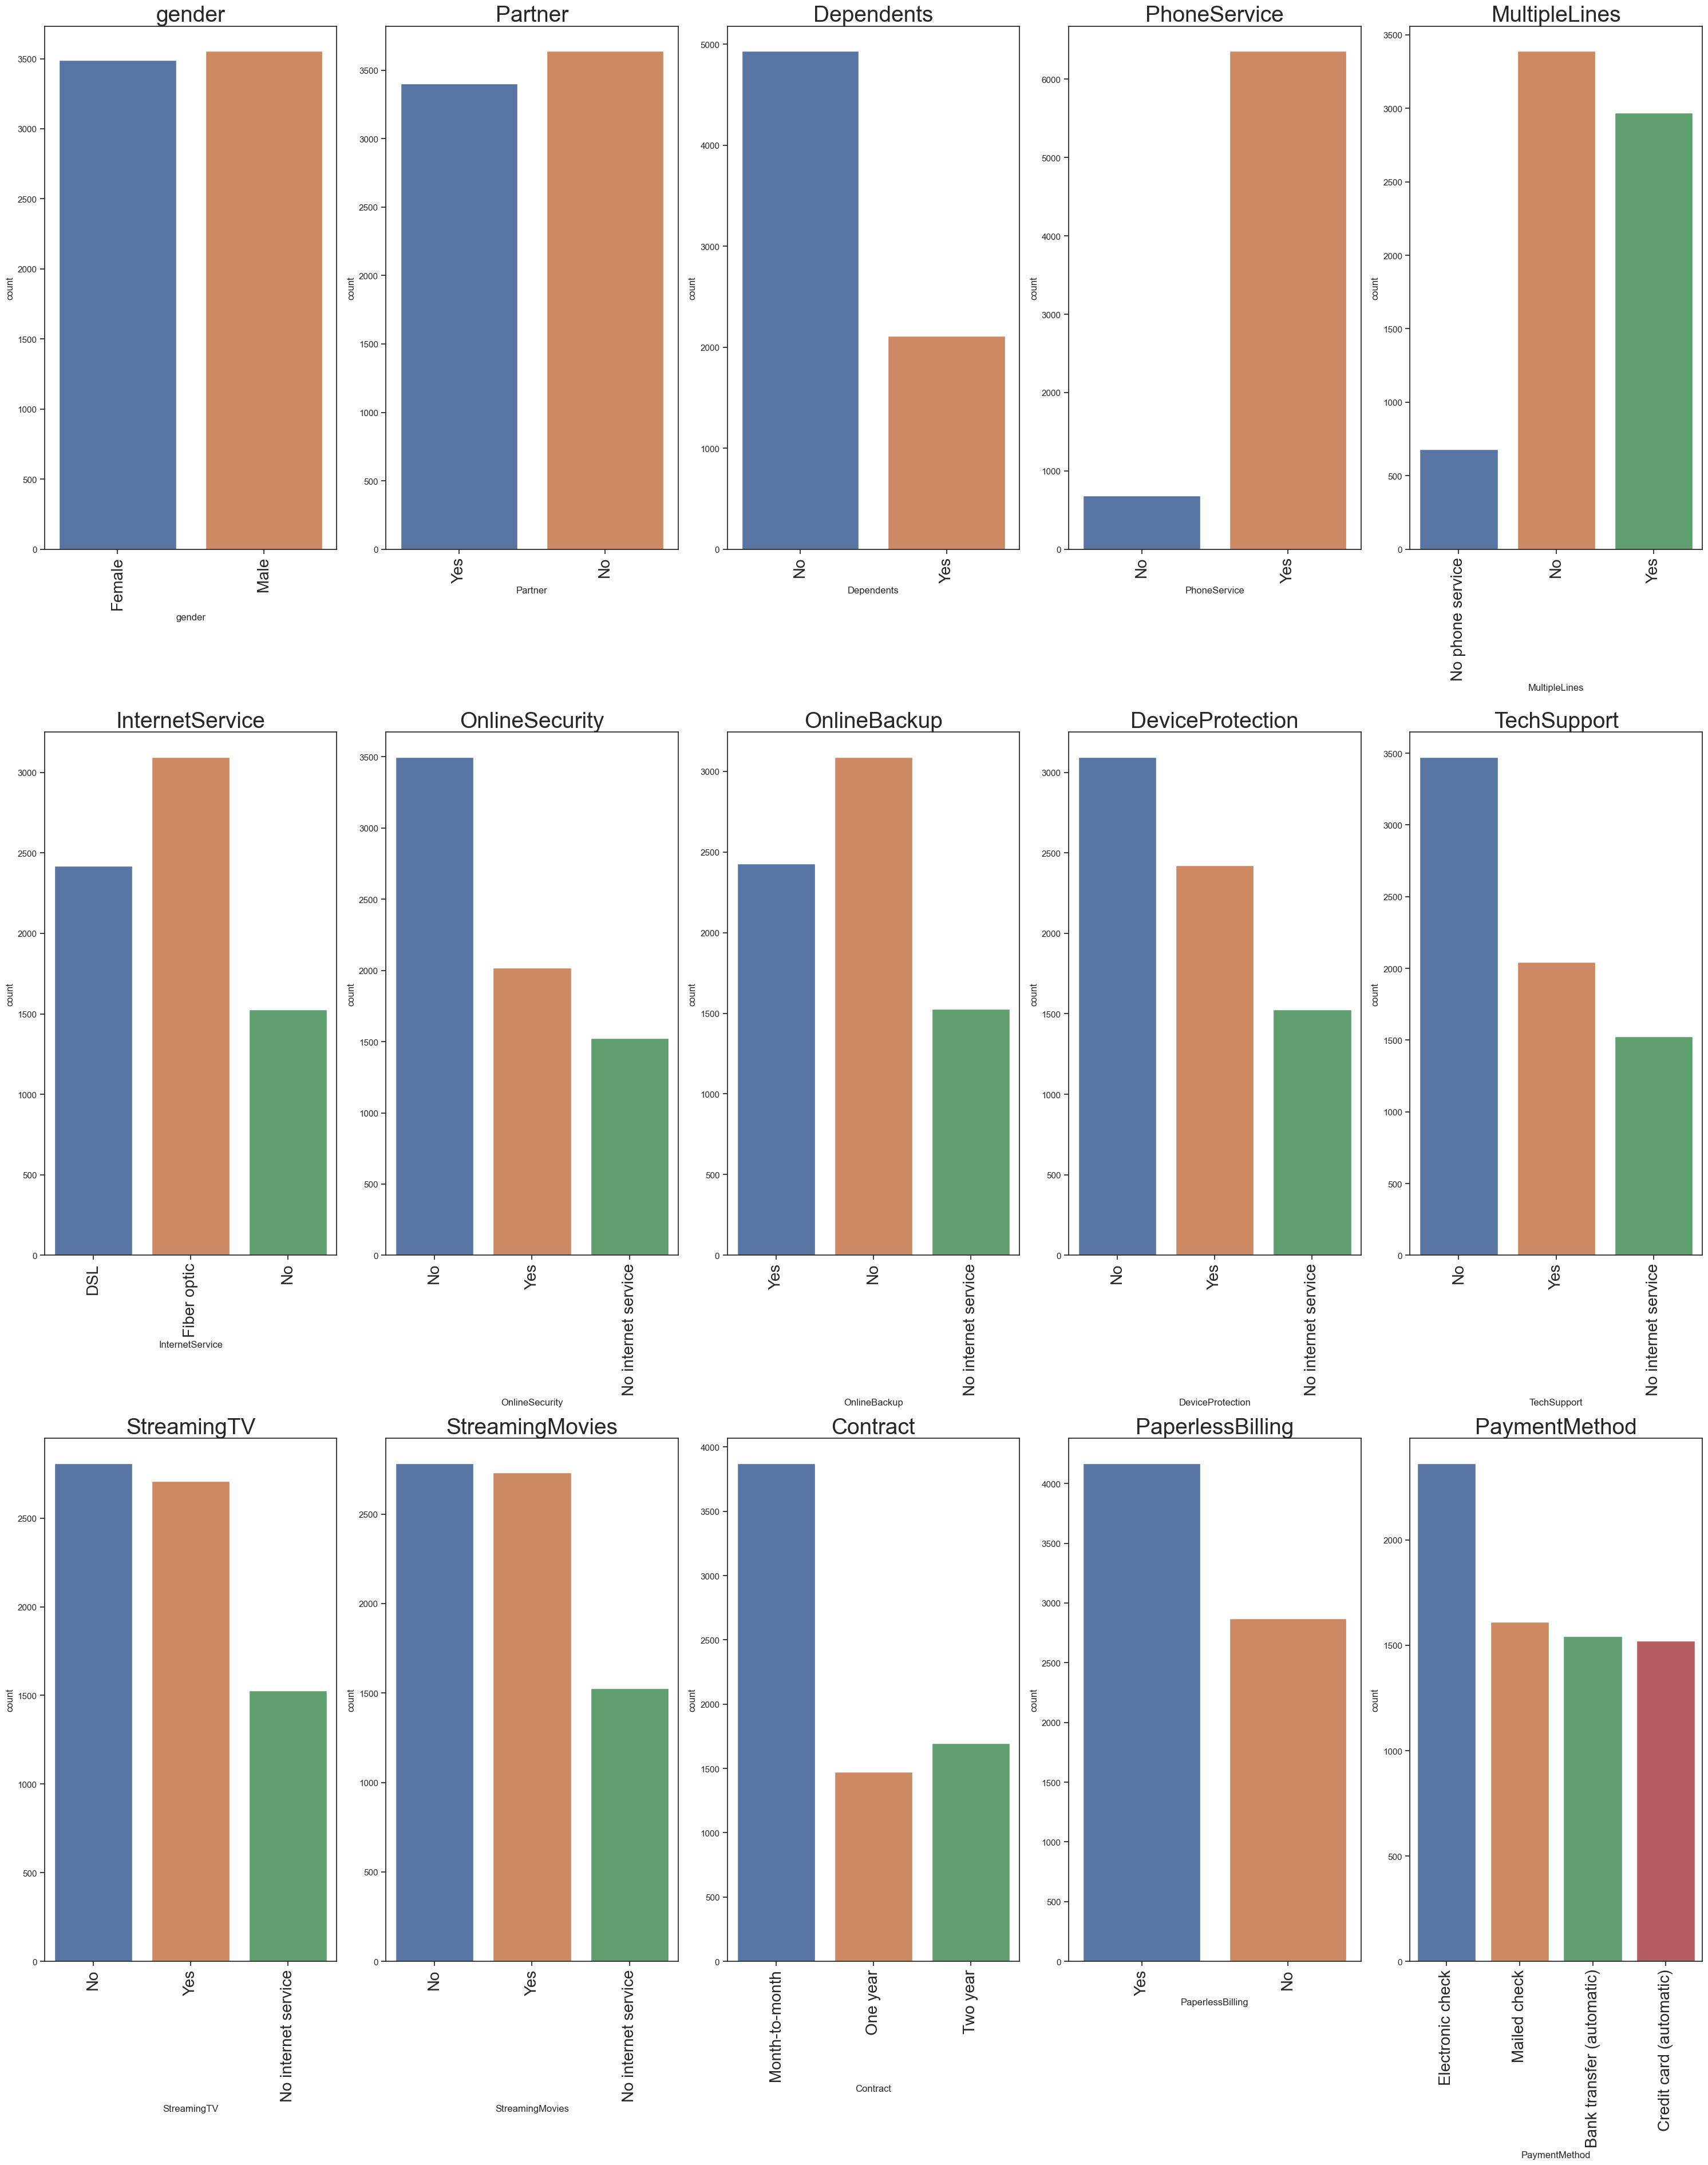

In [7]:
sns.set(style="ticks", color_codes=True)

# Define the categorical variables for visualization
categorical_cols = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
                    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
                    "PaperlessBilling", "PaymentMethod"]

# Create a 3x5 grid of subplots with larger size
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(30, 38))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical columns and create count plots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=28)  # Set title font size
    axes[i].tick_params(axis='x', rotation=90, labelsize=20)  # Set x-axis label rotation and font size

# Hide any unused subplots
for i in range(len(categorical_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

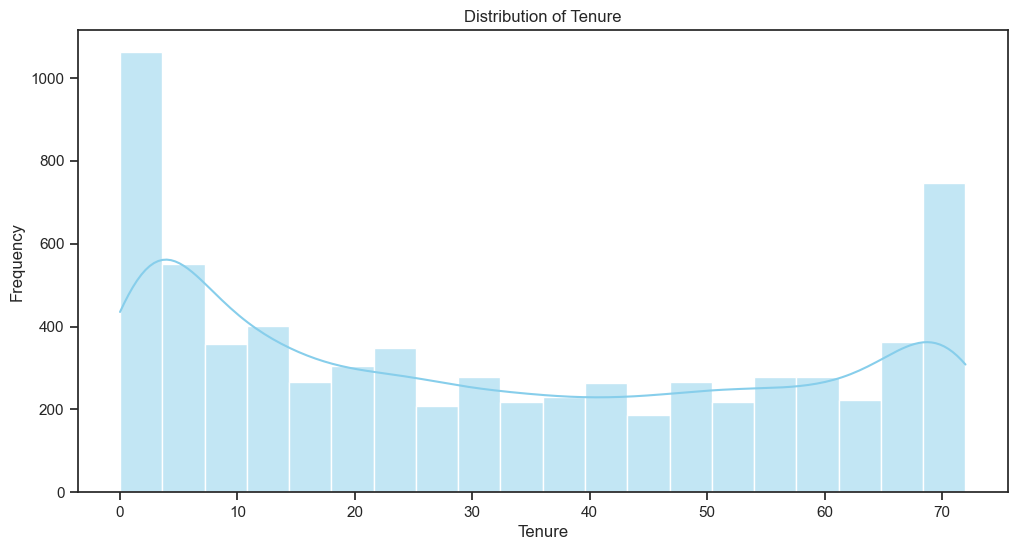

In [8]:
# Distribution of Numerical Features
plt.figure(figsize=(12, 6))
sns.histplot(df['tenure'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

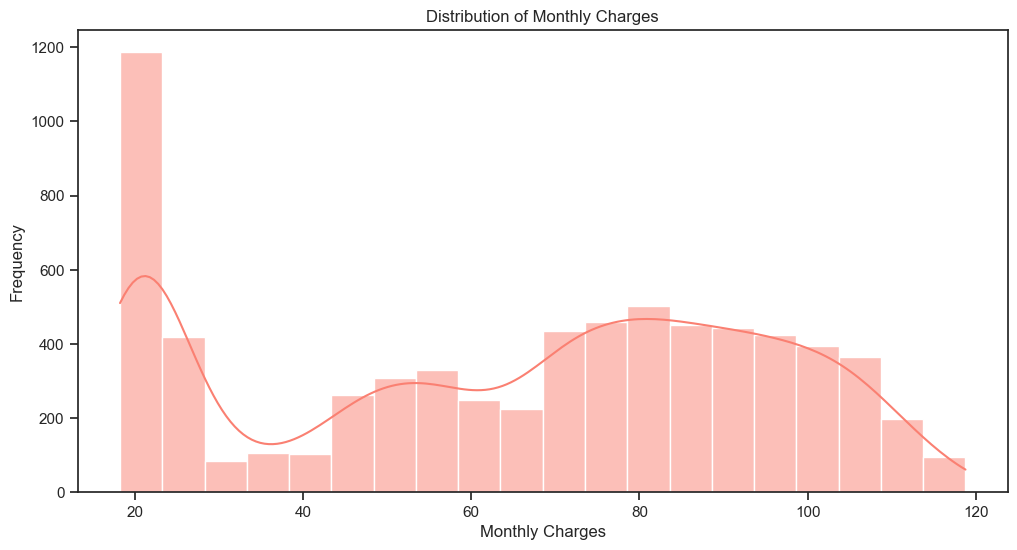

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyCharges'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

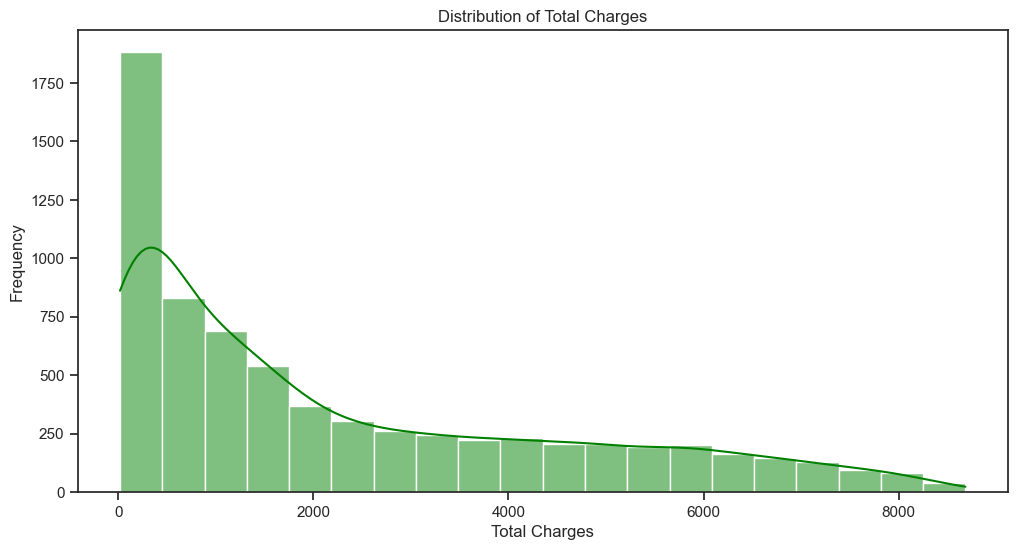

In [10]:
plt.figure(figsize=(12, 6))
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
sns.histplot(df['TotalCharges'].dropna(), bins=20, kde=True, color='green')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()


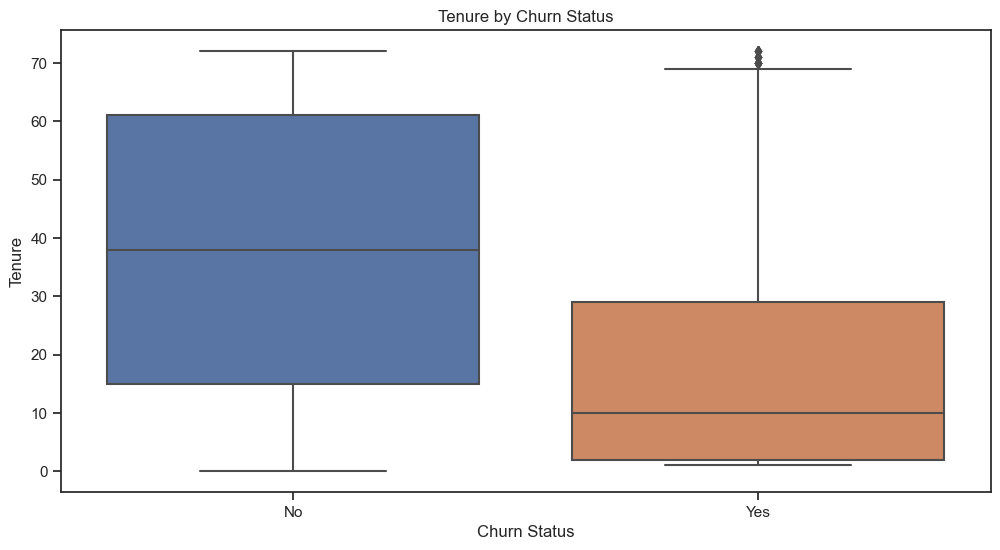

In [11]:
# Box plots for numerical features grouped by Churn status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Tenure')
plt.show()

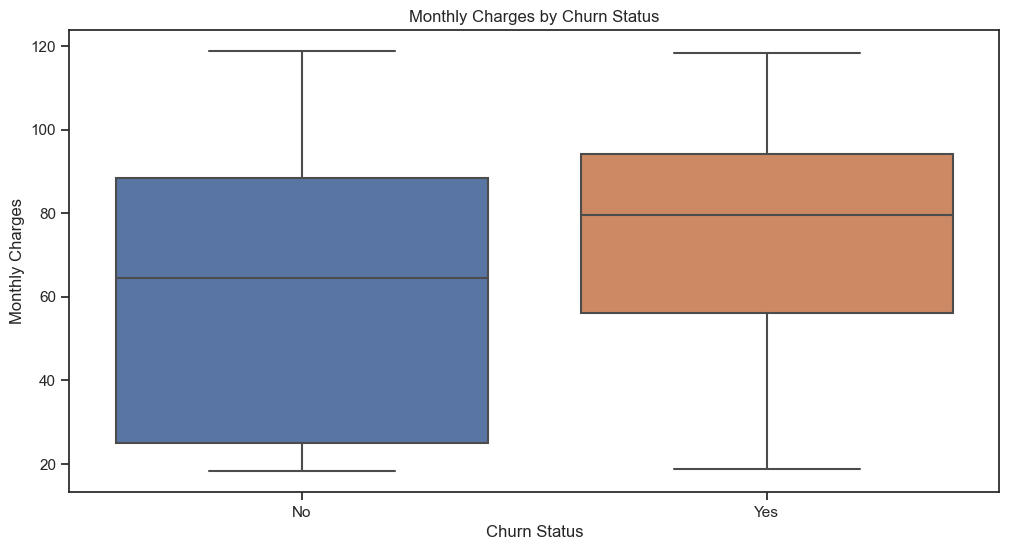

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')
plt.show()

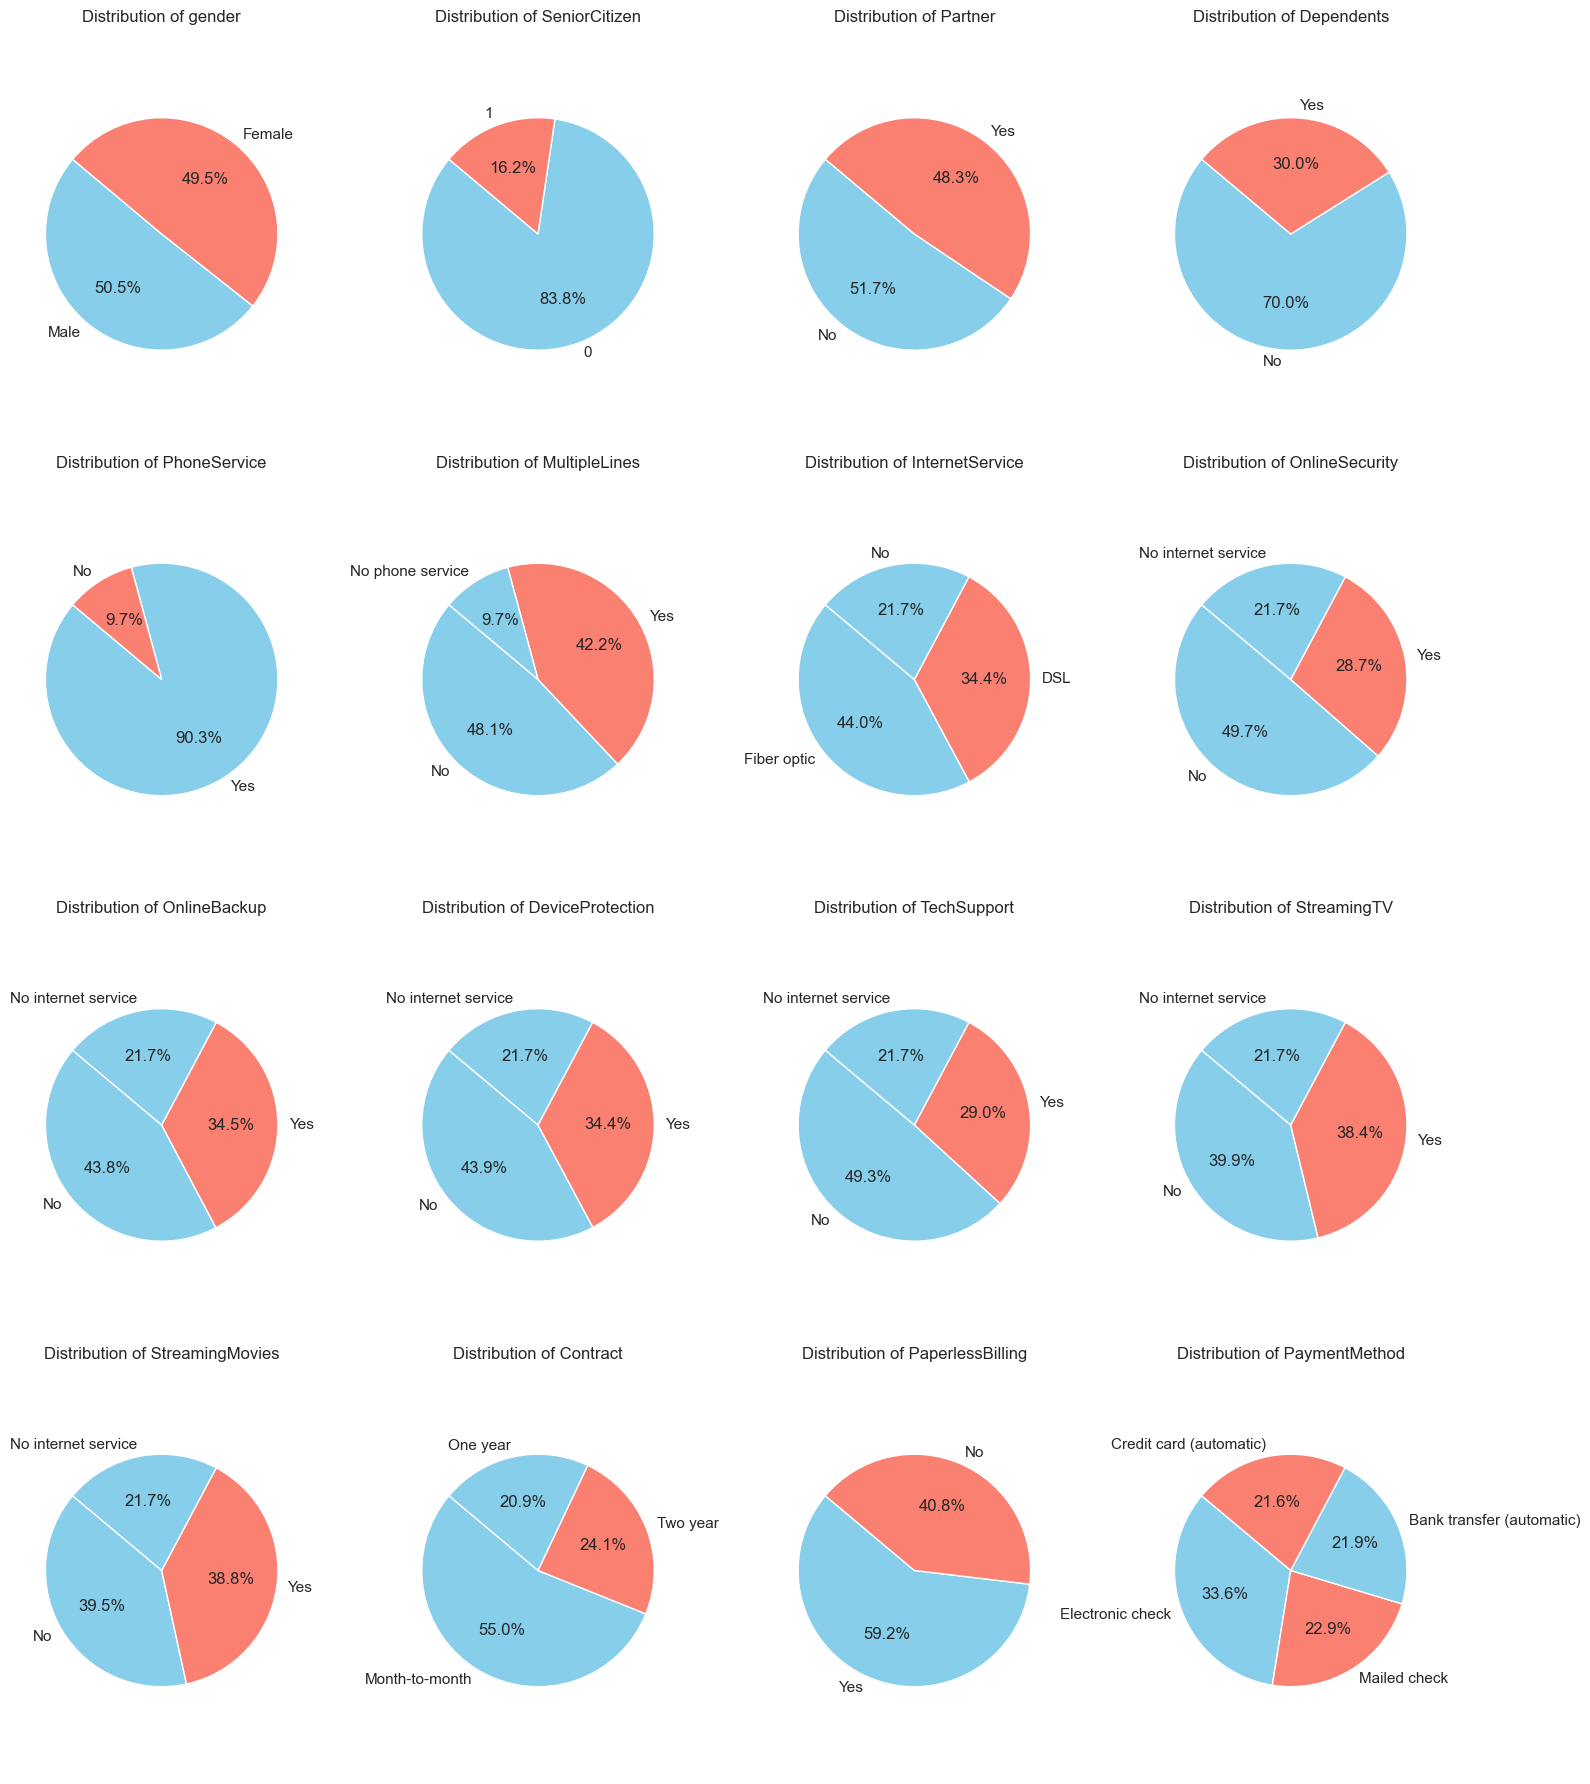

In [13]:
# Define categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Calculate number of rows and columns for subplots
num_cols = 4
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols

# Create subplots for pie charts
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 18))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over categorical columns and create pie charts
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    ax.set_title(f'Distribution of {col}')
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140, ax=ax)
    ax.set_ylabel('')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Hide any unused subplots
for i in range(len(categorical_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

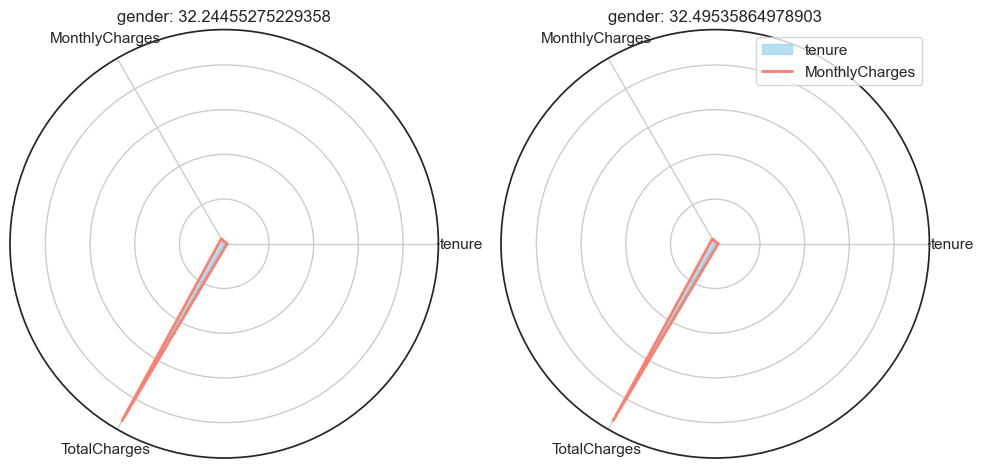

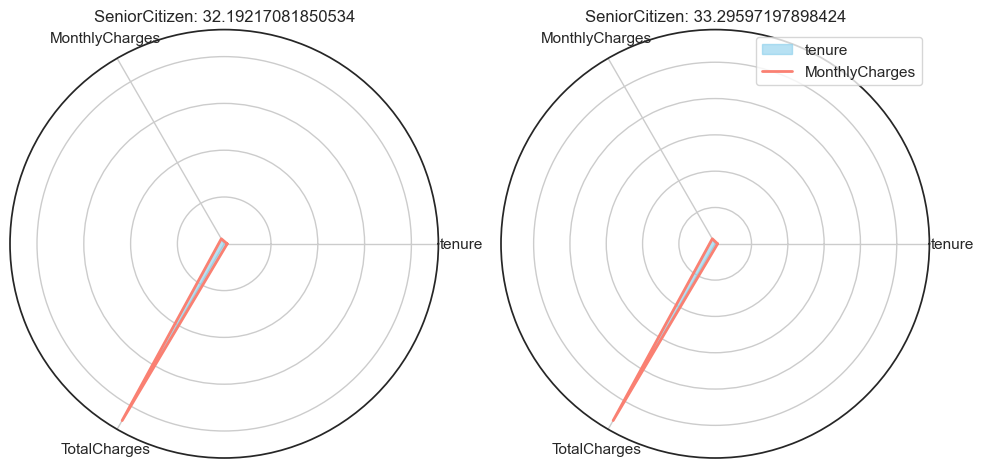

In [14]:
# Define the features you want to compare across categories
features_to_compare = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Define the categories to compare (e.g., 'gender', 'SeniorCitizen', etc.)
categories = ['gender', 'SeniorCitizen']

# Create radar charts for each category
for category in categories:
    # Group the data by the category and calculate the mean for each feature
    group_means = df.groupby(category)[features_to_compare].mean().reset_index()

    # Number of features
    num_features = len(features_to_compare)

    # Create a figure with a subplot for each category
    fig, axes = plt.subplots(1, len(group_means), subplot_kw=dict(polar=True), figsize=(10, 5))

    # Loop through each category and plot radar chart
    for i, (_, data) in enumerate(group_means.iterrows()):
        # Define angles for radar chart
        angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
        angles += angles[:1]  # Close the loop

        # The plot is circular, so we "complete the loop" and append the start to the end.
        data = np.concatenate((data[1:], [data[1]]))

        # Plot the radar chart
        ax = axes[i]
        ax.fill(angles, data, color='skyblue', alpha=0.6)
        ax.plot(angles, data, color='salmon', linewidth=2)
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])  # Remove the last angle to avoid overlap
        ax.set_xticklabels(features_to_compare, rotation=45)

        # Add a title to each subplot
        ax.set_title(f'{category}: {data[0]}')

    # Add a legend to the last subplot
    ax.legend(features_to_compare, loc='upper right')

    # Adjust the layout
    plt.tight_layout()

    # Show the radar charts
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


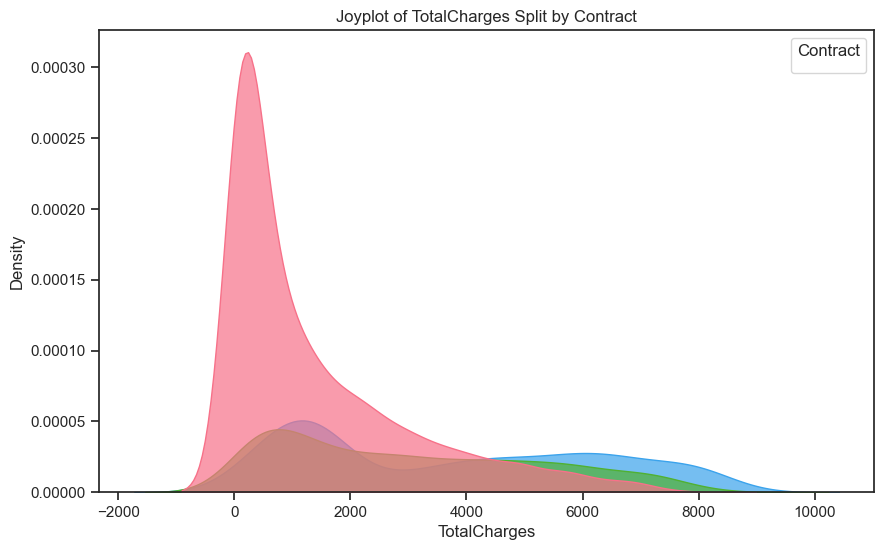

In [15]:
# Define the continuous variable to visualize
continuous_variable = 'TotalCharges'

# Define the categorical variable to split by
categorical_variable = 'Contract'

# Create the joyplot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=continuous_variable, hue=categorical_variable, fill=True, palette='husl', alpha=0.7)
plt.title(f'Joyplot of {continuous_variable} Split by {categorical_variable}')
plt.xlabel(continuous_variable)
plt.ylabel('Density')
plt.legend(title=categorical_variable)
plt.show()

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

In [17]:
# Specify the target column
target_column = 'Churn'

In [18]:
# Check if the target column exists in the dataset
if target_column not in df.columns:
    raise KeyError(f"Target column '{target_column}' not found in the dataset.")


In [19]:
# Define categorical columns and numerical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != target_column]
numerical_cols = [col for col in df.columns if col not in categorical_cols and col != target_column]

In [20]:
# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Append classifier to preprocessing pipeline
classifier = RandomForestClassifier()

# Create and fit the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)])

# Train-test split
X = df.drop(target_column, axis=1)
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', RandomForestClassifier())])

In [23]:
pipeline.score(X_train,y_train)

1.0

In [24]:

from sklearn.metrics import accuracy_score

# Predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7998580553584103


In [25]:
from sklearn.svm import SVC

# Append SVM classifier to preprocessing pipeline
svm_classifier = SVC()
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', svm_classifier)])

In [26]:
# Train and fit SVM pipeline
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', SVC())])

In [27]:
# Evaluate SVM model
svm_accuracy = svm_pipeline.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.7352732434350603


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

# Append Gradient Boosting classifier to preprocessing pipeline
gb_classifier = GradientBoostingClassifier()
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', gb_classifier)])

In [29]:
# Train and fit Gradient Boosting pipeline
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', GradientBoostingClassifier())])

In [30]:
# Evaluate Gradient Boosting model
gb_accuracy = gb_pipeline.score(X_test, y_test)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.8147622427253371


In [31]:
from sklearn.tree import DecisionTreeClassifier

# Append Decision Tree classifier to preprocessing pipeline
dt_classifier = DecisionTreeClassifier()
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', dt_classifier)])

In [32]:
# Train and fit Decision Tree pipeline
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', DecisionTreeClassifier())])

In [33]:
# Evaluate Decision Tree model
dt_accuracy = dt_pipeline.score(X_test, y_test)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7707594038325053
